<a href="https://colab.research.google.com/github/Shivam151299/Machine-Learning-/blob/main/Logistic_Regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [11]:
import pandas as pd #dataframe 
import numpy as np #lin alegbra 
import math #simple math
from tqdm import tqdm #progress bar
from sklearn.model_selection import train_test_split 
import matplotlib.pyplot as plt
import seaborn as sns
import pathlib

In [12]:
pip install --upgrade xlrd

In [13]:
train_df = pd.read_excel('/content/Lab3_data.xls', sheet_name = '2004--2005 Data')
test_df = pd.read_excel('/content/Lab3_data.xls', sheet_name = '2004--2007 Data')

In [14]:
train_df.head()

,y,x1,x2
0,1,71,140
1,1,74,185
2,1,70,145
3,1,67,145
4,1,72,170


In [15]:
train_df['x1'].mean(), train_df['x2'].mean()

(69.34782608695652, 163.95652173913044)

In [16]:
np.std(train_df['x1']), np.std(train_df['x2'])

(4.344999080924242, 30.25109162366608)

In [17]:
class LogisticRegression:
    def __init__(self,X,y,learningRate, tolerance, maxIteration):
        self.X = X
        self.y = y
        self.learningRate = learningRate
        self.tolerance = tolerance 
        self.maxIteration = maxIteration
        
        
    def addX0(self, X):
        return np.column_stack([np.ones([X.shape[0]]), X])
    
    def sigmoid(self,z):
        sig = 1/(1+ np.exp(-z))
        return sig
    
    def costFunction(self, X, y): 
        pred_ = np.log(np.ones(X.shape[0])+ np.exp(X.dot(self.w))) - X.dot(self.w).dot(y)
        cost = pred_.sum()
        return cost 
    
    def gradient(self, X, y): 
        sig = self.sigmoid(X.dot(self.w))
        grad = (sig - y).dot(X)
        return grad 
    
    def gradientDescent(self,X,y):
        errors = [] #create empty array to store errors
        last = float('inf')
        
        for i in  tqdm(range(self.maxIteration)):
            self.w = self.w - self.learningRate * self.gradient(X,y)
            
            curr = self.costFunction(X,y)
            diff = last - curr
            last = curr
            
            errors.append(curr)
            
            if diff < self.tolerance: 
                print("The model stopped - no further improvement")
                break
                
                
        self.plot_cost(errors)
        
        
    def predict(self, X): 
        sig = self.sigmoid(X.dot(self.w))
        return np.around(sig)
    
    def evaluate(self,y,y_hat):
        y = (y==1)
        y_hat = (y_hat ==1)
        
        precision = (y & y_hat).sum()/y_hat.sum()
        recall = (y*y_hat).sum()/y.sum()
        fScore = 2*(precision*recall)/(precision+recall)
        print(self.w)
        return fScore, recall, precision
    
    
    def remove_index(self, X, y, removeindex):
        X_removed = np.delete(X, removeindex, axis =0)
        y_removed = np.delete(y,removeindex, axis =0)
        return X_removed, y_removed
    
    def run_model(self):
         
        X_train = self.X
        y_train = self.y    
            
        accept = 0 
        
        while accept == 0:
                       
            self.w = np.ones(X_train.shape[1], dtype = np.float64)*0
        
            self.gradientDescent(X_train,y_train)
            print(self.w)
            y_hat_train = self.predict(X_train)
            fScore, recall, precision = self.evaluate(y_train, y_hat_train)
        
            print("F1_score is: ", fScore)
            print("Precision is: ", precision)
            print('Recall is: ', recall)
            
            self.plot(X_train, y_train)
            self.scatterPlt(X_train, y_train)
            self.plot3D(X_train, y_train)
            
            print("Entries in dataset: ", X_train.shape[0])
            indexremove = input('\n\n\nIf you would like to remove data point(s) enter the data point number here separated by a space. \n If you do not press enter\n')
            
            if indexremove == "":
                accept = 1
                
            else:
                indexremove = indexremove.split()
                indexremove = [int(i) for i in indexremove]
                indexremove = [x -1 for x in indexremove]
                print(indexremove)
                
                X_train, y_train = self.remove_index(X_train, y_train, indexremove)

        print("Done")
        
        
    def plot(self, X_train, y_train):
         
            
        print(self.w)    
        plt.figure(figsize=(12, 8))
        ax = plt.axes(projection='3d')

         #Data for three-dimensional scattered points
        ax.scatter3D(X_train[:, 0], X_train[:, 1], 
                     self.sigmoid(X_train.dot(self.w)), 
                     c = y_train[:], cmap='viridis', s=100);

        ax.set_xlim3d(55, 80)
        ax.set_ylim3d(80, 240)
        plt.xlabel('$x_1$ feature', fontsize=15)
        plt.ylabel('$x_2$ feature', fontsize=15, )
        ax.set_zlabel('$P(Y = 1|x_1, x_2)$', fontsize=15, rotation = 0)
  
    
    def scatterPlt(self, X_train, y_train):
        
        # evenly sampled points
        x_min, x_max = 55, 80
        y_min, y_max = 80, 180

        xx, yy = np.meshgrid(np.linspace(x_min, x_max, 250),
                             np.linspace(y_min, y_max, 250))
        grid = np.c_[xx.ravel(), yy.ravel()]
        probs = grid.dot(self.w).reshape(xx.shape)

        f, ax = plt.subplots(figsize=(14,12))


        ax.contour(xx, yy, probs, levels=[0.5], cmap="Greys", vmin=0, vmax=.6)


        ax.scatter(X_train[:, 0], X_train[:, 1], 
                   c=y_train[:], s=50,
                   cmap="RdBu", vmin=-.2, vmax=1.2,
                   edgecolor="white", linewidth=1)

        plt.xlabel('x1 feature')
        plt.ylabel('x2 feature')
        
      
    def plot3D(self, X_train, y_train):
       
        # evenly sampled points
        x_min, x_max = 55, 80
        y_min, y_max = 80, 240
        
        xx, yy = np.meshgrid(np.linspace(x_min, x_max, 250),
                             np.linspace(y_min, y_max, 250))
        
        grid = np.c_[xx.ravel(), yy.ravel()]
        probs = grid.dot(self.w).reshape(xx.shape)
        fig = plt.figure(figsize=(14,12))
        ax = plt.axes(projection='3d')
        ax.contour3D(xx, yy, probs, 50, cmap='binary')

        ax.scatter3D(X_train[:, 0], X_train[:, 1], 
                   c=y_train[:], s=50,
                   cmap="RdBu", vmin=-.2, vmax=1.2,
                   edgecolor="white", linewidth=1)

        ax.set_xlabel('x1')
        ax.set_ylabel('x2')
        ax.set_zlabel('probs')
        ax.set_title('3D contour')
        plt.show()

    def plot_cost(self, cost_sequence):
        # Data for plotting
        s = np.array(cost_sequence)
        t = np.arange(s.size)

        fig, ax = plt.subplots()
        ax.plot(t, s)

        ax.set(xlabel='iterations', ylabel='cost',
               title='cost trend')
        ax.grid()

        plt.legend(bbox_to_anchor=(1.05,1), loc=2, shadow=True)
        plt.show()           

In [18]:
train_X,train_y = train_df.values[:,1:], train_df.values[:, 0]
test_X,test_y = test_df.values[:,1:], test_df.values[:, 0]

In [19]:
lr = LogisticRegression(train_X,train_y,learningRate = 0.000001, 
                        tolerance = 0.0001, maxIteration = 10000)

100%|██████████| 10000/10000 [00:00<00:00, 16972.51it/s]
No handles with labels found to put in legend.


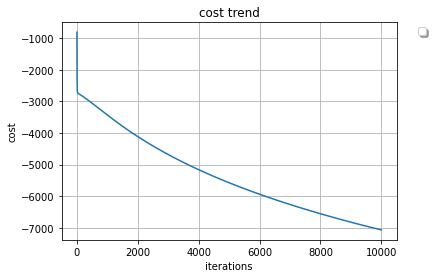

[-0.28014363  0.13767497]
[-0.28014363  0.13767497]
F1_score is:  0.9589041095890412
Precision is:  0.9459459459459459
Recall is:  0.9722222222222222
[-0.28014363  0.13767497]


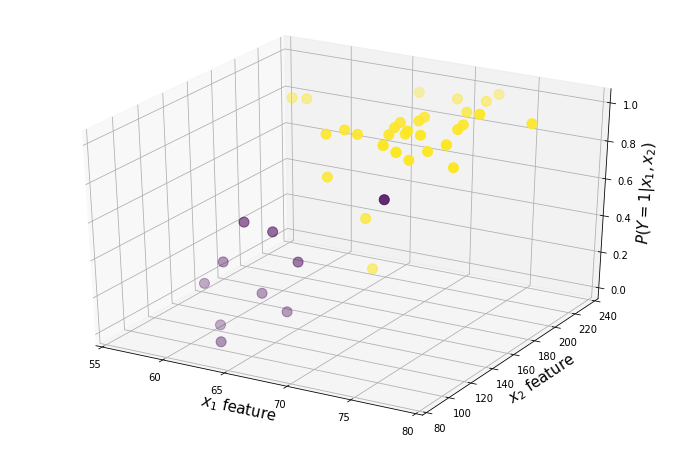

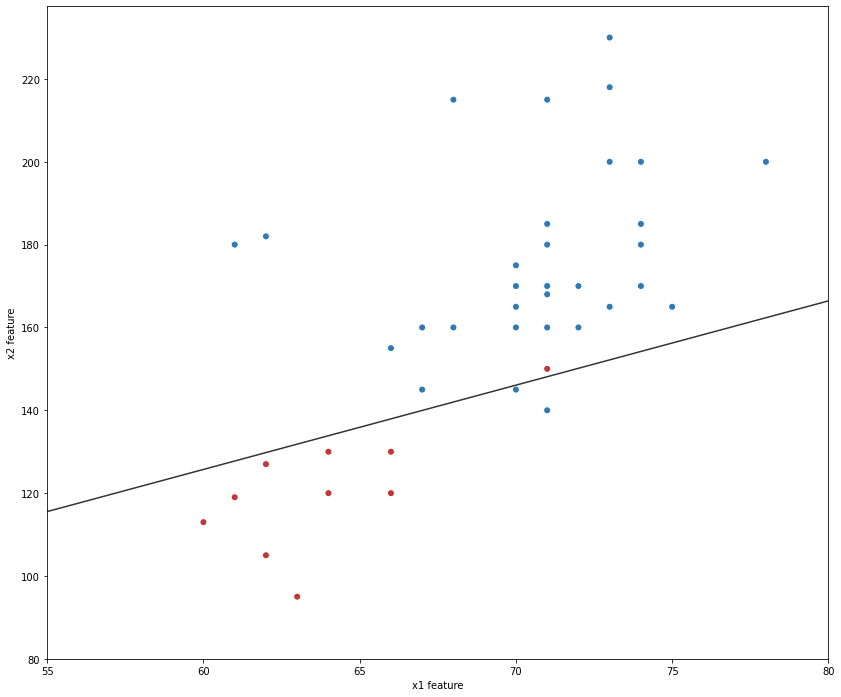

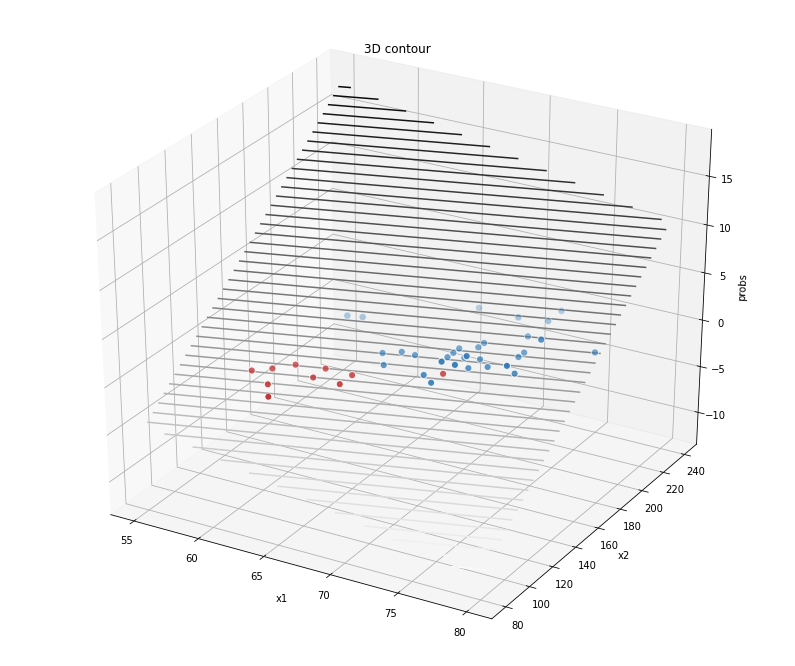

Entries in dataset:  46



If you would like to remove data point(s) enter the data point number here separated by a space. 
 If you do not press enter
1 39
[0, 38]


100%|██████████| 10000/10000 [00:00<00:00, 26749.93it/s]
No handles with labels found to put in legend.


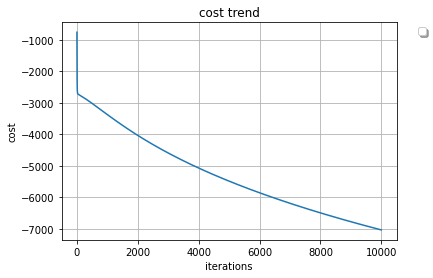

[-0.29127103  0.14305931]
[-0.29127103  0.14305931]
F1_score is:  0.9859154929577464
Precision is:  0.9722222222222222
Recall is:  1.0
[-0.29127103  0.14305931]


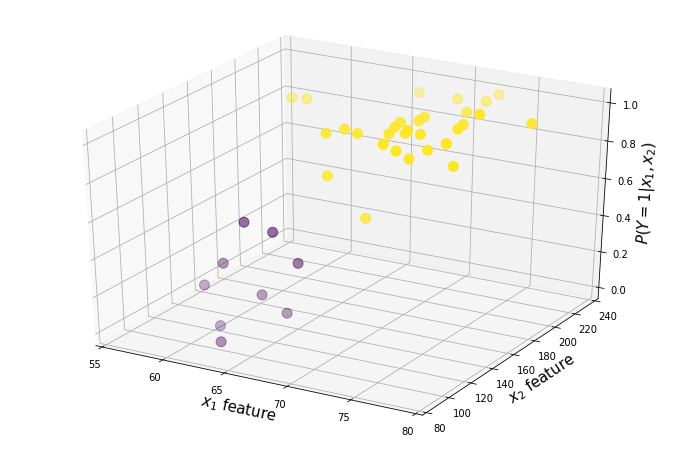

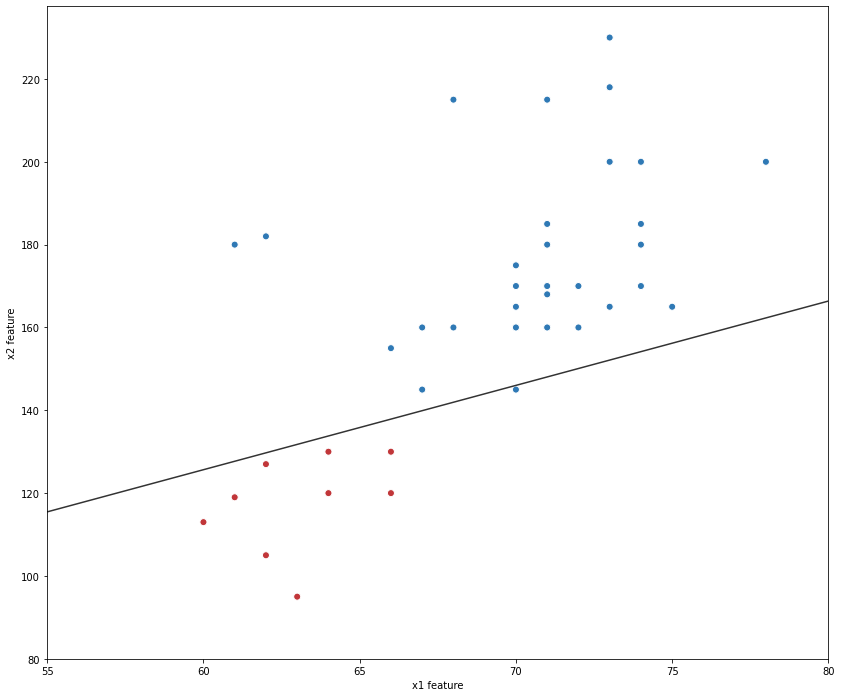

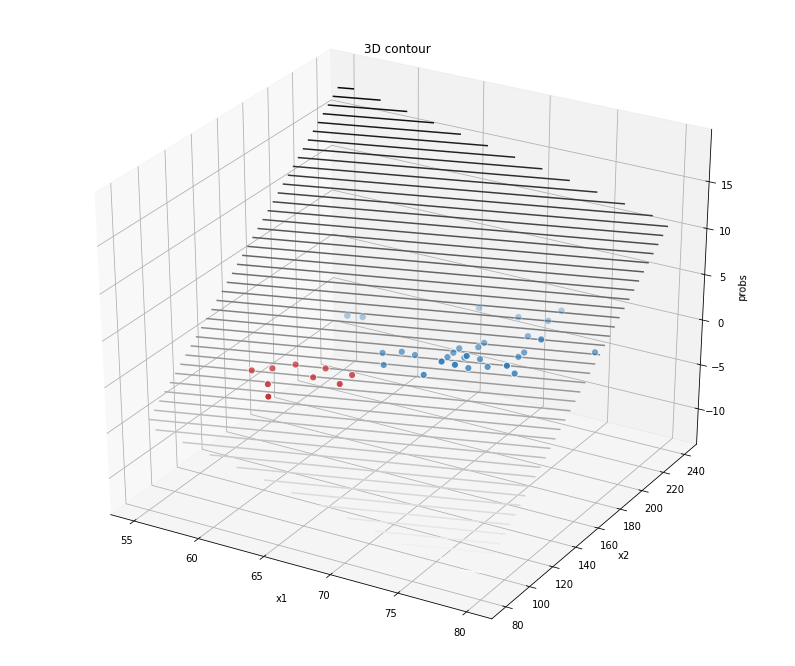

Entries in dataset:  44



If you would like to remove data point(s) enter the data point number here separated by a space. 
 If you do not press enter

Done


In [20]:
lr.run_model()

In [21]:
#Evaluate on test data

y_hat_test = lr.predict(test_X)
fScore, recall, precision = lr.evaluate(test_y,y_hat_test)
print("F1_score is: ", fScore)
print("Precision is: ", precision)
print('Recall is: ', recall)

[-0.29127103  0.14305931]
F1_score is:  0.9271523178807948
Precision is:  0.9090909090909091
Recall is:  0.9459459459459459
